## Assignment 5 Solutions
Author: Laura Bissoltan

### Problem 1

In [131]:
#1.1

def parabolic(f,x0,x2,tol,imax):
    x1=(x0+x2)/2
    print("Search interval: [",x0,",",x2,"]")
    
    R = (5.0**0.5-1.0)/2.0
    imax = ceil(log(tol/(x2-x0))/log(R))
    print(f'Number of iterations (function evaluations): {imax}')
    
    
    if f(x0)>f(x1) or f(x1)<f(x2):
        print("Maximum does not exist in given interval")
        
    for i in range(imax):
        
        n=((f(x1)-f(x0))/(f(x2)-f(x0)))*(x2**2-x0**2)-(x1**2-x0**2)
        d=2*((f(x1)-f(x0))/(f(x2)-f(x0)))*(x2-x0)-2*(x1-x0)
        x3=n/d
                  
        if f(x3)>f(x1):
            x0=x1
            x1=x3
            x2=x2
      
        elif f(x3)<f(x1):
            x0=x0
            x2=x1
            x1=x3
        
        elif abs((x1-x3))<tol: break
      
    x1=x3
        
    return x3, f(x3)
    


In [132]:
#1.6

from numpy import sinh

def f(x):
    return (4/x)*(1-x**2/(sinh(x))**2)
x3, f3 = parabolic(f,1,4,0.01,50)

print("x_opt:", x3, " f(x_opt):",f(x3))


Search interval: [ 1 , 4 ]
Number of iterations (function evaluations): 12
x_opt: 1.911186046523174  f(x_opt): 1.3937436772136036


### Problem 2

$\hspace{16mm}$ $a)\hspace{2mm} Gradient \hspace{2mm}vector:$

$$f(x,y)=2xy^2+13e^{xy}$$ 
$$f_x=2y^2+13ye^{xy} \hspace{8 mm}f_y=4xy+13xe^{xy}$$
$$\nabla f(x,y)=(2y^2+13ye^{xy},4xy+13xe^{xy})$$

$\hspace{16mm}$ $\hspace{5mm} Hessian \hspace{2mm}matrix:$
$$f_{xx}=13y^2e^{xy}$$
$$f_{yy}=4x+13x^2e^{xy}$$
$$f_{xy}=f_{yx}=4y+13e^{xy}+13xye^{xy}$$


$$\begin{bmatrix}
13y^2e^{xy} & 4y+13e^{xy}+13xye^{xy}\\
4y+13e^{xy}+13xye^{xy} & 4x+13x^2e^{xy} 
\end{bmatrix}$$

$\hspace{16mm}$ $b)\hspace{2mm} Gradient \hspace{2mm}vector:$
$$f(x,y)=ln(x^2+2xy+3y^2)$$
$$f_x=\frac{2x+2y}{x^2+2xy+3y^2}$$
$$f_y=\frac{2x+6y}{x^2+2xy+3y^2}$$
$$\nabla f(x,y)=(\frac{2x+2y}{x^2+2xy+3y^2},\frac{2x+6y}{x^2+2xy+3y^2})$$

$\hspace{16mm}$ $\hspace{5mm} Hessian \hspace{2mm}matrix:$
$$f_{xx}=\frac{2(x^2+2xy+3y^2)-(2x+2y)(2x+2y)}{(x^2+2xy+3y^2)^2}=\frac{-2x^2-4xy+2y^2}{(x^2+2xy+3y^2)^2}$$
$$f_{yy}=\frac{6(x^2+2xy+3y^2)-(2x+6y)(2x+6y)}{(x^2+2xy+3y^2)^2}=\frac{2x^2-12xy-18y^2}{(x^2+2xy+3y^2)^2}$$
$$f_{xy}=f_{yx}=\frac{2(x^2+2xy+3y^2)-(2x+6y)(2x+2y)}{(x^2+2xy+3y^2)^2}=\frac{-2x^2-12xy-6y^2}{(x^2+2xy+3y^2)^2}$$

$$\begin{bmatrix}
\frac{-2x^2-4xy+2y^2}{(x^2+2xy+3y^2)^2} & \frac{-2x^2-12xy-6y^2}{(x^2+2xy+3y^2)^2}\\
\frac{-2x^2-12xy-6y^2}{(x^2+2xy+3y^2)^2} & \frac{2x^2-12xy-18y^2}{(x^2+2xy+3y^2)^2} 
\end{bmatrix}$$

### Problem 3

In [133]:
#golden search method from lecture

def goldensearch(f,a0,b0,tol):

    a = a0
    b = b0
    d0 = b-a # b0>a0
    R = (5.0**0.5-1.0)/2.0
    imax = ceil(log(tol/d0)/log(R))
   
    #first iteration
    d = R*d0 
    x1 = a+d
    x2 = b-d
    f1 = f(x1)
    f2 = f(x2)

    
    for i in range(2,imax+1):
        d = R*d
        if f1 > f2:
            a = x2
            #b=b
            x2 = x1
            x1 = a+d
            f2 = f1
            f1 = f(x1)
        else:
            #a=a
            b = x1
            x1 = x2
            x2 = b-d
            f1 = f2
            f2 = f(x2)                       


    if f1 > f2:
        return x1,f1
    else:
        return x2,f2


In [134]:
#3.1

from numpy import e

def f(x,y):
    return e**(-(x-1)**2-(y-1)**2-0.5*x**3*y**3)
def dfdx(x,y):
    return f(x,y)*(-2*x+2-1.5*x**2*y**3)
def dfdy(x,y):
    return f(x,y)*(-2*y+2-1.5*x**3*y**2)  

    
def steepest(x0,y0,tol,imax):
    for i in range(imax):
        def g(h):   
            return f(x0+dfdx(x0,y0)*h,y0+dfdy(x0,y0)*h)
        h,k=goldensearch(g,0.1,5,0.01)
    
        x1=x0+dfdx(x0,y0)*h
        y1=y0+dfdy(x0,y0)*h
        if abs(y0-y1)<tol and abs(x0-x1)<tol: break
        x0=x1
        y0=y1
    return x1,y1,f(x1,y1)
        
x_opt,y_opt,f_max = steepest(0.5,-0.5,0.01,50)
print("x_opt:",x_opt,"\n" "y_opt:",y_opt,"\n""f_max:",f_max)



x_opt: 0.7857801723071233 
y_opt: 0.7781609740963835 
f_max: 0.8110610243886027


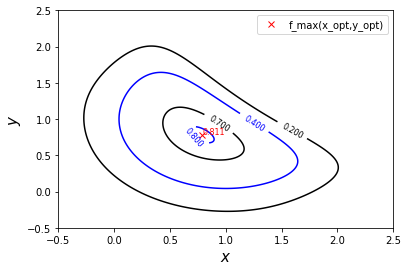

In [135]:
#3.2 and #3.3
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(-0.5, 2.5, 1500)
y = np.linspace(-0.5, 2.5, 1500)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

CS=plt.contour(X, Y, Z,[0.2,0.4,0.7,0.8],colors=['k','b','k','b']);


plt.clabel(CS,inline = 1, fontsize=8)
plt.xlabel('$x$',size=15)
plt.ylabel('$y$',size=15)
#plt.scatter([0.78578],[0.77816],'r',label='f_max(x_opt,y_opt)')
plt.plot([0.78578],[0.77816],'rx',label='f_max(x_opt,y_opt)')
plt.legend(loc='upper right',fontsize='10')
plt.text(0.79,0.79,'0.811',size=8,c='r')
plt.show()

